In [2]:
# standards imports
import collections

# additional imports
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
import random

## TASK A - Creation of Network

In [3]:
def create_network():
    # Load the data from the CSV file into a pandas dataframe
    data = pd.read_csv("REQUEST_A_QUERY.csv")
    # data

    # Initialize a dictionary to store unique user IDs
    node_ids = {}
    # Counter to keep track of unique user IDs
    counter = 0
    # Loop through the dataframe to assign a unique ID to each user
    for index, row in data.iterrows():
        # Get the user name from the "username" column
        user = row["username"]
        # Assign a unique ID to each user name
        if user not in node_ids:
            node_ids[user] = counter
            counter += 1

    # Creating an empty graph
    G = nx.Graph()

    # Adding the nodes_id/user to the graph
    for user in node_ids:
        G.add_node(node_ids[user], name=user)

    # grouping the data by "page name" and "thread subject" columns
    for _, group in data.groupby(["page_name", "thread_subject"]):
        # adding the users that have made a comment in the same thread and in the same page
        group_users = group["username"].tolist()
        # nested for loop to create the edges of the graph based on the group_users list created
        for i in range(len(group_users) - 1):
            for j in range(i + 1, len(group_users)):
                G.add_edge(node_ids[group_users[i]], node_ids[group_users[j]])

    return G

G = create_network()
# print("number of nodes before the edges:",len(node_ids))
print("Number of nodes:", G.number_of_nodes())
print("Number of edges:", G.number_of_edges())

Number of nodes: 698
Number of edges: 1884


### Time Complexity

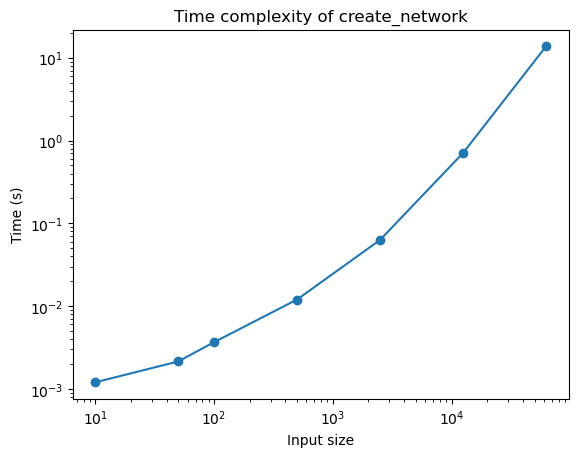

In [4]:
import numpy as np
import pandas as pd
import networkx as nx
import time
import matplotlib.pyplot as plt

def create_network_time_complexity(n):
    # Generate random data with n rows
    data = pd.DataFrame(np.random.randint(0, 100, size=(n, 2)), columns=["username", "page_name"])

    # Initialize a dictionary to store unique user IDs
    node_ids = {}
    counter = 0

    start_time = time.time()

    for index, row in data.iterrows():
        user = row["username"]
        if user not in node_ids:
            node_ids[user] = counter
            counter += 1

    G = nx.Graph()

    for user in node_ids:
        G.add_node(node_ids[user], name=user)

    for _, group in data.groupby(["page_name"]):
        group_users = group["username"].tolist()
        for i in range(len(group_users) - 1):
            for j in range(i + 1, len(group_users)):
                G.add_edge(node_ids[group_users[i]], node_ids[group_users[j]])

    end_time = time.time()

    return end_time - start_time

# Test the function with different input sizes
# The input sizes are multiplied by a constant c=5 of the previous input size 
input_sizes = [10, 50, 100, 500, 2500, 12500, 62500]
times = [create_network_time_complexity(n) for n in input_sizes]

# Plot the time complexity as a function of the input size
plt.plot(input_sizes, times, '-o')
plt.xlabel("Input size")
plt.ylabel("Time (s)")
plt.xscale("log")
plt.yscale("log")
plt.title("Time complexity of create_network")
plt.show()

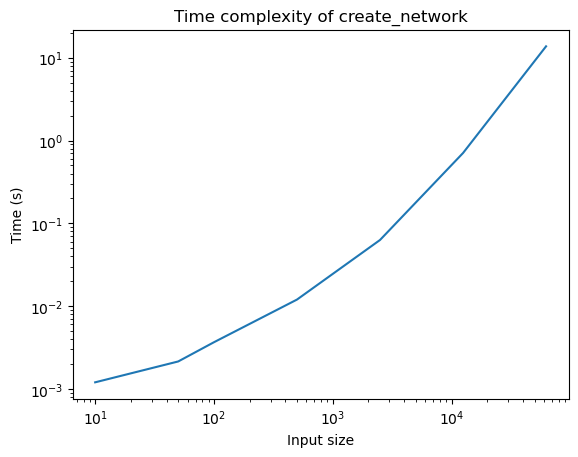

In [5]:
# Plot the time complexity as a function of the input size
plt.plot(input_sizes, times, '-')
plt.xlabel("Input size")
plt.ylabel("Time (s)")
plt.xscale("log")
plt.yscale("log")
plt.title("Time complexity of create_network")
plt.show()

### Visualization of the Network

In [6]:
from bokeh.io import output_file, output_notebook, show
from bokeh.plotting import figure, from_networkx

output_notebook()

Loading BokehJS ...

In [7]:
crop_factors = dict(x_range=(-1.1,1.1), y_range=(-1.1,1.1))

plot = figure(
    title="Wikidata Editor Network",
    tools="", toolbar_location=None, **crop_factors
)

layout = nx.spring_layout(G)
layout = {node: tuple(val) for node, val in layout.items()}

graph_plot = from_networkx(
    G, layout, scale=2, center=(0,0))
plot.renderers.append(graph_plot)

# output_file("networkx_graph.html")
show(plot)

## TASK B

### Characteristic properties and relevant metrics and distributions of this Wikidata editor network

In [8]:
def print_graph_statistics(graph):

    print("Number of nodes: {}\nNumber of edges: {}".format(
        graph.number_of_nodes(), graph.number_of_edges()
    ))
    print("Number of connected components: {}".format(
        nx.number_connected_components(graph),
    ))
    print("Average degree: {}\nClustering coefficient: {}".format(
        np.mean([deg for _, deg in graph.degree]),
        nx.average_clustering(graph)
    ))

    try:  # attempt to compute the diameter of the graph
        diam = nx.diameter(graph)
        print("Graph diameter: {}".format(diam))
    except:  # an error has  occurred
        print("\nERROR: Could not compute the diameter of the graph.")    

In [9]:
print_graph_statistics(G)

Number of nodes: 698
Number of edges: 1884
Number of connected components: 31
Average degree: 5.3982808022922635
Clustering coefficient: 0.5128717931772322

ERROR: Could not compute the diameter of the graph.


In [10]:
# Statistics of each components in the graph
for i, conn_component in enumerate(
    nx.connected_components(G)):
    print(f"[Graph component {i}]")
    sub_graph = G.subgraph(conn_component)  # XXX Careful to manupulations!
    print_graph_statistics(sub_graph)
    print("-"*50 + "\n")

[Graph component 0]
Number of nodes: 665
Number of edges: 1881
Number of connected components: 1
Average degree: 5.6571428571428575
Clustering coefficient: 0.5383225738912903
Graph diameter: 5
--------------------------------------------------

[Graph component 1]
Number of nodes: 1
Number of edges: 0
Number of connected components: 1
Average degree: 0.0
Clustering coefficient: 0.0
Graph diameter: 0
--------------------------------------------------

[Graph component 2]
Number of nodes: 2
Number of edges: 1
Number of connected components: 1
Average degree: 1.0
Clustering coefficient: 0.0
Graph diameter: 1
--------------------------------------------------

[Graph component 3]
Number of nodes: 1
Number of edges: 0
Number of connected components: 1
Average degree: 0.0
Clustering coefficient: 0.0
Graph diameter: 0
--------------------------------------------------

[Graph component 4]
Number of nodes: 1
Number of edges: 0
Number of connected components: 1
Average degree: 0.0
Clustering co

In [11]:
largest_component = max(nx.connected_components(G), key=len)
G_subgraph = G.subgraph(largest_component)
print_graph_statistics(G_subgraph)


Number of nodes: 665
Number of edges: 1881
Number of connected components: 1
Average degree: 5.6571428571428575
Clustering coefficient: 0.5383225738912903
Graph diameter: 5


In [12]:
crop_factors = dict(x_range=(-1.1,1.1), y_range=(-1.1,1.1))

plot = figure(
    title="Wikidata Editor Network (largest component)",
    tools="", toolbar_location=None, **crop_factors
)

layout = nx.spring_layout(G_subgraph)
layout = {node: tuple(val) for node, val in layout.items()}

graph_plot = from_networkx(
    G_subgraph, layout, scale=2, center=(0,0))
plot.renderers.append(graph_plot)

# output_file("networkx_graph.html")
show(plot)

In [13]:
# Average degree
degree_sequence = [d for n, d in G_subgraph.degree()]
sum(degree_sequence) / len(degree_sequence)

5.6571428571428575

Counter({1: 243, 2: 170, 3: 79, 4: 43, 5: 29, 7: 15, 6: 11, 8: 11, 9: 9, 10: 6, 13: 5, 17: 4, 11: 4, 47: 3, 12: 3, 16: 3, 49: 2, 27: 2, 15: 2, 21: 2, 46: 2, 14: 2, 138: 1, 50: 1, 25: 1, 39: 1, 212: 1, 26: 1, 52: 1, 118: 1, 30: 1, 366: 1, 23: 1, 22: 1, 106: 1, 230: 1, 42: 1})
dict_items([(138, 1), (50, 1), (25, 1), (7, 15), (39, 1), (47, 3), (49, 2), (2, 170), (5, 29), (212, 1), (13, 5), (10, 6), (17, 4), (11, 4), (26, 1), (3, 79), (1, 243), (27, 2), (6, 11), (4, 43), (52, 1), (118, 1), (8, 11), (30, 1), (366, 1), (15, 2), (21, 2), (9, 9), (12, 3), (16, 3), (46, 2), (14, 2), (23, 1), (22, 1), (106, 1), (230, 1), (42, 1)])


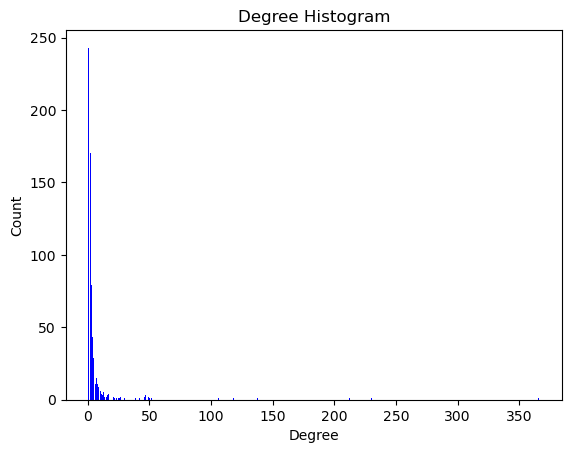

In [14]:
# Plot the degree distribution of the graph
degreeCount = collections.Counter(degree_sequence)
print(degreeCount) # dictionary
print(degreeCount.items()) # list of tuples
deg, cnt = zip(*degreeCount.items()) # * operator to unzip the zipped object

fig, ax = plt.subplots()
plt.bar(deg, cnt, width = 0.80, color="b")
plt.title("Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")
plt.show()

In [15]:
# Determine whether the graph contains cycles or else is a tree
try:
    cycle = networkx.find_cycle(G_subgraph)
    print("Graph contains cycles, e.g. %s" % str(G_subgraph))
except:
    print("Graph is a tree")

Graph is a tree


### Differences of this network from a random network

#### Generating a Random Network

We will create an Erdos-Renyi graph for which **n** and **p** match the number of nodes and frequency of edge occurrence in the real network (largest component). The real network (largest component) has 665 nodes (so **n = 665**) and 1881 edges. The potential number of edges is n(n-1)/2, and so the frequency by which edges occur is **p = 1881/(n(n-1)/2)**. Let's use **networkx** to create a random graph of this scale, where **erdos_renyi_graph** is one function to generate these random graphs.

In [16]:
# Generate a random graph with the same number of nodes and edges
N = G_subgraph.number_of_nodes()
E = G_subgraph.number_of_edges()
print(N)
print(E)

665
1881


In [17]:
p = E/(N*(N-1)/2)
p

0.008519793459552496

In [18]:
random_graph = nx.erdos_renyi_graph(n=N, p=p)

In [19]:
# A random graph will typically have a low diameter as there are short cuts between each node pair
# If p is small, it is more likely that the graph will have multiple connected components.
# When a graph has multiple connected components, there is no well-defined diameter for the entire graph, as there is no path between nodes in different components.
print_graph_statistics(random_graph)

Number of nodes: 665
Number of edges: 1995
Number of connected components: 2
Average degree: 6.0
Clustering coefficient: 0.007564524030689435

ERROR: Could not compute the diameter of the graph.


In [20]:
largest_component_random = max(nx.connected_components(random_graph), key=len)
random_graph_subgraph = random_graph.subgraph(largest_component_random)
print_graph_statistics(random_graph_subgraph)

Number of nodes: 664
Number of edges: 1995
Number of connected components: 1
Average degree: 6.009036144578313
Clustering coefficient: 0.007575916386157341
Graph diameter: 8


In [21]:
crop_factors = dict(x_range=(-1.1,1.1), y_range=(-1.1,1.1))

plot = figure(
    title="Random Network",
    tools="", toolbar_location=None, **crop_factors
)

layout = nx.spring_layout(random_graph_subgraph)
layout = {node: tuple(val) for node, val in layout.items()}

graph_plot = from_networkx(
    random_graph_subgraph, layout, scale=2, center=(0,0))
plot.renderers.append(graph_plot)

# output_file("networkx_graph.html")
show(plot)

In [22]:
# The average degree is around 5.85, which matches the average degree seen in the real network
degree_sequence_random = [d for n, d in random_graph_subgraph.degree()]
sum(degree_sequence_random) / len(degree_sequence_random)

6.009036144578313

Counter({6: 115, 5: 113, 4: 88, 7: 80, 8: 65, 3: 48, 9: 45, 2: 39, 10: 33, 11: 16, 1: 9, 12: 9, 13: 3, 14: 1})
dict_items([(5, 113), (7, 80), (9, 45), (6, 115), (3, 48), (10, 33), (4, 88), (1, 9), (8, 65), (11, 16), (12, 9), (2, 39), (14, 1), (13, 3)])


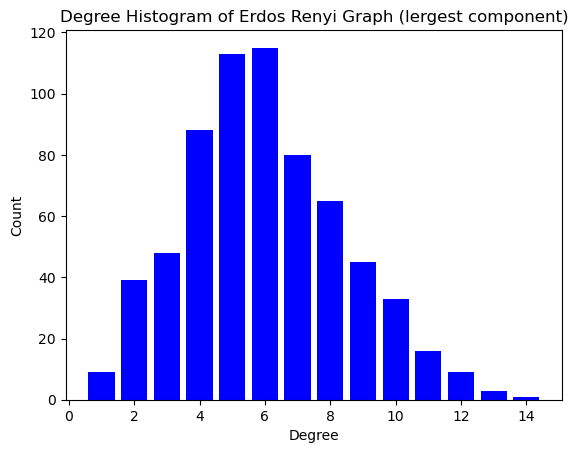

In [23]:
# Plot the degree distribution of the graph
degreeCount_random = collections.Counter(degree_sequence_random)
print(degreeCount_random) # dictionary
print(degreeCount_random.items()) # list of tuples
deg, cnt = zip(*degreeCount_random.items()) # * operator to unzip the zipped object

fig, ax = plt.subplots()
plt.bar(deg, cnt, width = 0.80, color="b")
plt.title("Degree Histogram of Erdos Renyi Graph (lergest component)")
plt.ylabel("Count")
plt.xlabel("Degree")
plt.show()

We expect this to be (approximate) a binomial distribution, and indeed you should see it does.
In contrast, we saw that the real network is heavily skewed to a few nodes having very high degree and a long tail of nodes with lower degree.

### Two editors are connected iff they have both contributed to any thread in the same page, but not necessarily to the same thread

In [24]:
def create_network_same_page():
    # Load the data from the CSV file into a pandas dataframe
    data = pd.read_csv("REQUEST_A_QUERY.csv")

    # Initialize a dictionary to store unique user IDs
    node_ids = {}
    # Counter to keep track of unique user IDs
    counter = 0
    # Loop through the dataframe to assign a unique ID to each user
    for index, row in data.iterrows():
        # Get the user name from the "username" column
        user = row["username"]
        # Assign a unique ID to each user name
        if user not in node_ids:
            node_ids[user] = counter
            counter += 1

    # Creating an empty graph
    G2 = nx.Graph()

    # Adding the nodes_id/user to the graph
    for user in node_ids:
        G2.add_node(node_ids[user], name=user)

    # grouping the data by "page name"
    for _, group in data.groupby(["page_name"]):
        # get the thread subjects for the current user and page
        threads = group["thread_subject"].unique()
        # get the users who have also contributed to any of these threads
        same_page_users = data[(data["page_name"] == group["page_name"].iloc[0]) & 
                               (data["username"] != group["username"].iloc[0]) & 
                               (data["thread_subject"].isin(threads))]["username"].unique()
        # nested for loop to create the edges of the graph based on the same_page_users list
        for user in same_page_users:
            G2.add_edge(node_ids[group["username"].iloc[0]], node_ids[user])

    return G2


G2 = create_network_same_page()

In [25]:
crop_factors = dict(x_range=(-1.1,1.1), y_range=(-1.1,1.1))

plot = figure(
    title="Graph with editors contributed to any thread in the same page ",
    tools="", toolbar_location=None, **crop_factors
)

layout = nx.spring_layout(G2)
layout = {node: tuple(val) for node, val in layout.items()}

graph_plot = from_networkx(
    G2, layout, scale=2, center=(0,0))
plot.renderers.append(graph_plot)

# output_file("networkx_graph.html")
show(plot)

In [26]:
print_graph_statistics(G2)

Number of nodes: 698
Number of edges: 1895
Number of connected components: 1
Average degree: 5.429799426934097
Clustering coefficient: 0.14787755424222582
Graph diameter: 5


# Task C

## If both editors have been comenting more than usual on the same day (i.e might be controversial, trolling etc), hoe can thry use the network data to judge how plausible it is that this behaviour has not propagated yet to neighboring similar nodes?

In [27]:
def create_network():
    # Load the data from the CSV file into a pandas dataframe
    data = pd.read_csv("REQUEST_A_QUERY.csv")

    # Initialize a dictionary to store unique user IDs and the threads they have commented on
    node_ids = {}
    # Counter to keep track of unique user IDs
    counter = 0
    # Loop through the dataframe to assign a unique ID to each user
    for index, row in data.iterrows():
        # Get the user name and thread information from the "username", "page_name", and "thread_subject" columns
        user = row["username"]
        page_name = row["page_name"]
        thread_subject = row["thread_subject"]
        # Assign a unique ID to each user name
        if user not in node_ids:
            node_ids[user] = {"id": counter, "threads": set()}
            counter += 1
        # Add the thread information to the user's set of threads
        node_ids[user]["threads"].add((page_name, thread_subject))

    # Creating a weighted graph
    G = nx.Graph()

    # Adding the nodes_id/user to the graph
    for user in node_ids:
        G.add_node(node_ids[user]["id"], name=user)

    # Grouping the data by "page name" and "thread subject" columns
    for _, group in data.groupby(["page_name", "thread_subject"]):
        # Adding the users that have made a comment in the same thread and in the same page
        group_users = group["username"].tolist()
        # Calculating the weights of the edges
        edges = []
        for i in range(len(group_users) - 1):
            for j in range(i + 1, len(group_users)):
                user_i = node_ids[group_users[i]]["id"]
                user_j = node_ids[group_users[j]]["id"]
                if G.has_edge(user_i, user_j):
                    # If the edge already exists, increment the weight
                    G[user_i][user_j]['weight'] += 1
                else:
                    # If the edge does not exist, add the edge with weight 1
                    G.add_edge(user_i, user_j, weight=1)

    return G, node_ids

In [28]:
G_subgraph, node_ids = create_network()

# Find all threads with more than one user commenting
threads = {}
for user in node_ids:
    for thread in node_ids[user]["threads"]:
        if thread not in threads:
            threads[thread] = set()
        threads[thread].add(user)

shared_threads = [thread for thread in threads if len(threads[thread]) > 1]

# Randomly select a thread and two users that have commented on it
thread = random.choice(shared_threads)
users = random.sample(threads[thread], 2)

# Get the IDs of the two users
editor1 = node_ids[users[0]]["id"]
editor2 = node_ids[users[1]]["id"]

# Calculate the weighted shortest path length between the two users
def shortest_path_length_weighted(editor1, editor2):
    try:
        return nx.shortest_path_length(G_subgraph, source=editor1, target=editor2, weight='weight')
    except:
        return float('inf')

# Get the names of the two users
print('thread',thread)
print(users[0], users[1])
print("Users:", editor1, editor2)
shortest_path_len = shortest_path_length_weighted(editor1, editor2)
print(f"The weighted shortest path length between {editor1} and {editor2} is {shortest_path_len}.")

thread ('WikidataRequestaqueryArchive201709.json', ' Query for organisms whose wikipedia page is not linked to the scientific name ')
HYanWong VIGNERON
Users: 80 15
The weighted shortest path length between 80 and 15 is 1.


/var/folders/f7/5b6xj7tx2j980czxfkmrn8y00000gn/T/ipykernel_71395/2541041744.py:15: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  users = random.sample(threads[thread], 2)


In [29]:
# Get neighboring nodes for editor1 and editor2
neighbor_nodes_1 = list(G_subgraph[editor1])
neighbor_nodes_2 = list(G_subgraph[editor2])

# Calculate weighted shortest path length for all neighbors to editor1 and editor2
avg_path_len_1 = 0
avg_path_len_2 = 0
for neighbor in neighbor_nodes_1:
    # Calculate shortest path length to editor1
    try:
        path_len_1 = nx.shortest_path_length(G_subgraph, source=editor1, target=neighbor, weight='weight')
        avg_path_len_1 += path_len_1
    except:
        pass

for neighbor in neighbor_nodes_2:
    # Calculate shortest path length to editor2
    try:
        path_len_2 = nx.shortest_path_length(G_subgraph, source=editor2, target=neighbor, weight='weight')
        avg_path_len_2 += path_len_2
    except:
        pass

# Calculate average shortest path length for all neighbors to editor1 and editor2
avg_path_len_1 /= len(neighbor_nodes_1)
avg_path_len_2 /= len(neighbor_nodes_2)


print("\nWeighted shortest path lengths:")
for neighbor in neighbor_nodes_1:
    path_len_1 = nx.shortest_path_length(G_subgraph, source=editor1, target=neighbor, weight='weight')
    print(f"Neighbor {neighbor}: to Editor1 = {path_len_1}")
    
for neighbor in neighbor_nodes_2:
    path_len_2 = nx.shortest_path_length(G_subgraph, source=editor2, target=neighbor, weight='weight')
    print(f"Neighbor {neighbor}: to Editor2 = {path_len_2}")

print(f"\nAverage shortest path length to Editor1: {avg_path_len_1}")
print(f"Average shortest path length to Editor2: {avg_path_len_2}")


Weighted shortest path lengths:
Neighbor 26: to Editor1 = 1
Neighbor 19: to Editor1 = 1
Neighbor 1: to Editor1 = 1
Neighbor 15: to Editor1 = 1
Neighbor 25: to Editor1 = 1
Neighbor 0: to Editor2 = 2
Neighbor 98: to Editor2 = 1
Neighbor 19: to Editor2 = 1
Neighbor 58: to Editor2 = 2
Neighbor 84: to Editor2 = 1
Neighbor 54: to Editor2 = 1
Neighbor 104: to Editor2 = 1
Neighbor 48: to Editor2 = 1
Neighbor 56: to Editor2 = 1
Neighbor 9: to Editor2 = 2
Neighbor 150: to Editor2 = 1
Neighbor 145: to Editor2 = 2
Neighbor 26: to Editor2 = 2
Neighbor 146: to Editor2 = 1
Neighbor 14: to Editor2 = 1
Neighbor 147: to Editor2 = 1
Neighbor 131: to Editor2 = 2
Neighbor 6: to Editor2 = 2
Neighbor 4: to Editor2 = 2
Neighbor 81: to Editor2 = 1
Neighbor 92: to Editor2 = 1
Neighbor 80: to Editor2 = 1
Neighbor 40: to Editor2 = 1
Neighbor 86: to Editor2 = 1
Neighbor 101: to Editor2 = 1
Neighbor 118: to Editor2 = 1
Neighbor 163: to Editor2 = 1
Neighbor 186: to Editor2 = 1
Neighbor 187: to Editor2 = 1
Neighbor 

NEW TINGS

In [30]:
def create_network():
    # Load the data from the CSV file into a pandas dataframe
    data = pd.read_csv("REQUEST_A_QUERY.csv")

    # Initialize a dictionary to store unique user IDs and the threads they have commented on
    node_ids = {}
    # Counter to keep track of unique user IDs
    counter = 0
    # Loop through the dataframe to assign a unique ID to each user
    for index, row in data.iterrows():
        # Get the user name and thread information from the "username", "page_name", and "thread_subject" columns
        user = row["username"]
        page_name = row["page_name"]
        thread_subject = row["thread_subject"]
        # Assign a unique ID to each user name
        if user not in node_ids:
            node_ids[user] = {"id": counter, "threads": set()}
            counter += 1
        # Add the thread information to the user's set of threads
        node_ids[user]["threads"].add((page_name, thread_subject))

    # Creating a weighted graph
    G = nx.Graph()

    # Adding the nodes_id/user to the graph
    for user in node_ids:
        G.add_node(node_ids[user]["id"], name=user)

    # Grouping the data by "page name" and "thread subject" columns
    for _, group in data.groupby(["page_name", "thread_subject"]):
        # Adding the users that have made a comment in the same thread and in the same page
        group_users = group["username"].tolist()
        # nested for loop to create the edges of the graph based on the group_users list created
        for i in range(len(group_users) - 1):
            for j in range(i + 1, len(group_users)):
                G.add_edge(node_ids[group_users[i]]["id"], node_ids[group_users[j]]["id"])

    return G, node_ids


In [31]:

G, node_ids = create_network()

# Find all threads with more than one user commenting
threads = {}
for user in node_ids:
    for thread in node_ids[user]["threads"]:
        if thread not in threads:
            threads[thread] = set()
        threads[thread].add(user)

shared_threads = [thread for thread in threads if len(threads[thread]) > 1]

# Randomly select a thread and two users that have commented on it
thread = random.choice(shared_threads)
users = random.sample(threads[thread], 2)

# Get the IDs of the two users
editor1 = node_ids[users[0]]["id"]
editor2 = node_ids[users[1]]["id"]

# Get the names of the two users
print('thread',thread)
print('user1:',users[0],'user2:', users[1])
print("Users:", editor1, editor2)



thread ('WikidataRequestaqueryArchive202103.json', ' specify senators who served in a particular legislative term? ')
user1: M2545 user2: TomT0m
Users: 482 25


/var/folders/f7/5b6xj7tx2j980czxfkmrn8y00000gn/T/ipykernel_71395/4069542397.py:15: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  users = random.sample(threads[thread], 2)


In [32]:
thresholds = {}
for node in G.nodes():
    neighbors = list(G.neighbors(node))
    print(neighbors)
    if len(neighbors) == 0:
        continue
    avg_degree = sum([G.degree(neighbor) for neighbor in neighbors])/len(neighbors)
    print(avg_degree)
    if node in node_ids:
        page_thread_weight = len(node_ids[node]["threads"])
    else:
        page_thread_weight = 0
    print(page_thread_weight)
    thresholds[node] = int(avg_degree + page_thread_weight)
    print(thresholds[node])


    

[1, 2, 15, 4, 12, 13, 9, 11, 10, 3, 6, 22, 23, 25, 37, 44, 35, 45, 43, 48, 47, 28, 66, 40, 36, 52, 46, 5, 69, 60, 70, 65, 53, 75, 76, 26, 19, 81, 30, 29, 86, 72, 98, 85, 82, 96, 94, 105, 102, 92, 107, 101, 57, 114, 74, 112, 110, 116, 118, 126, 121, 67, 120, 115, 122, 123, 124, 104, 136, 130, 58, 140, 143, 14, 150, 145, 144, 95, 148, 100, 152, 159, 157, 160, 142, 161, 170, 171, 131, 59, 172, 178, 211, 220, 128, 173, 219, 217, 239, 234, 244, 245, 186, 56, 229, 246, 224, 252, 267, 242, 198, 127, 17, 187, 282, 77, 283, 205, 339, 365, 38, 367, 350, 208, 388, 387, 264, 406, 409, 401, 273, 333, 469, 265, 537, 418, 544, 468]
17.659420289855074
0
17
[0, 2, 3, 9, 4, 12, 6, 11, 8, 21, 28, 29, 5, 26, 27, 24, 39, 19, 30, 53, 49, 69, 46, 67, 66, 68, 59, 71, 75, 52, 23, 81, 82, 35, 72, 93, 58, 36, 80, 118, 114, 44, 113, 92, 165, 173, 124, 201, 209, 145]
31.56
0
31
[0, 1, 6, 9, 31, 26, 53, 75, 52, 30, 70, 87, 19, 44, 5, 104, 109, 12, 14, 207, 58, 131, 265, 173, 100]
62.16
0
62
[1, 9, 7, 6, 0, 30, 71]


In [33]:

from ndlib.models.ModelConfig import Configuration
from ndlib.models.epidemics.ThresholdModel import ThresholdModel

# Set the initial state of the simulation
initial_infected_fraction = 2 / G.number_of_nodes()

# Configure the model with the threshold values
model = ThresholdModel(G)
config = Configuration()
config.add_model_parameter('threshold', thresholds)
config.add_model_parameter('fraction_infected', initial_infected_fraction)
model.set_initial_status(config)

# Simulate the model for 10 time steps
iterations = model.iteration_bunch(10)

# Check how many neighbors of each editor have adopted the behavior
editor1_neighbors = list(G_subgraph.neighbors(editor1))
editor1_adoption = sum([model.status[node] for node in editor1_neighbors])
editor2_neighbors = list(G_subgraph.neighbors(editor2))
editor2_adoption = sum([model.status[node] for node in editor2_neighbors])

print("Editor 1 adoption:", editor1_adoption)
print("Editor 2 adoption:", editor2_adoption)

Editor 1 adoption: 0
Editor 2 adoption: 1


In [34]:
def prioritize_editors_to_check(G, node_ids, editor_ids):
    """
    Given a graph G and a dictionary of node IDs and thread information node_ids, 
    returns a priority list of editors to check for trolling behavior, prioritizing those 
    with a higher chance of having been trolling.
    
    Args:
        G (networkx.Graph): The graph representing the user interactions.
        node_ids (dict): A dictionary of node IDs and thread information.
        editor_ids (list): A list of editor IDs to prioritize.
    
    Returns:
        A list of editor IDs, prioritized in descending order of their chance of having been trolling.
    """
    
    # Initialize a dictionary to store each editor's score
    editor_scores = {}
    
    # Calculate the score for each editor
    for editor in editor_ids:
        # Get the editor's neighbors
        neighbors = list(G.neighbors(editor))
        
        # Calculate the editor's average neighbor degree
        avg_degree = sum([G.degree(neighbor) for neighbor in neighbors])/len(neighbors)
        
        # Calculate the editor's thread weight
        if editor in node_ids:
            page_thread_weight = len(node_ids[editor]["threads"])
        else:
            page_thread_weight = 0
        
        # Calculate the editor's score
        score = avg_degree + page_thread_weight
        
        # Add the editor's score to the dictionary
        editor_scores[editor] = score
    
    # Sort the editors by their score in descending order
    prioritized_editors = sorted(editor_scores, key=editor_scores.get, reverse=True)
    
    return prioritized_editors


In [35]:
prioritize_editors_to_check(G, node_ids, [editor1, editor2])

[482, 25]

latest latest

In [36]:
import ndlib.models.epidemics as ep
import ndlib.models.ModelConfig as mc
from ndlib.viz.mpl.DiffusionTrend import DiffusionTrend

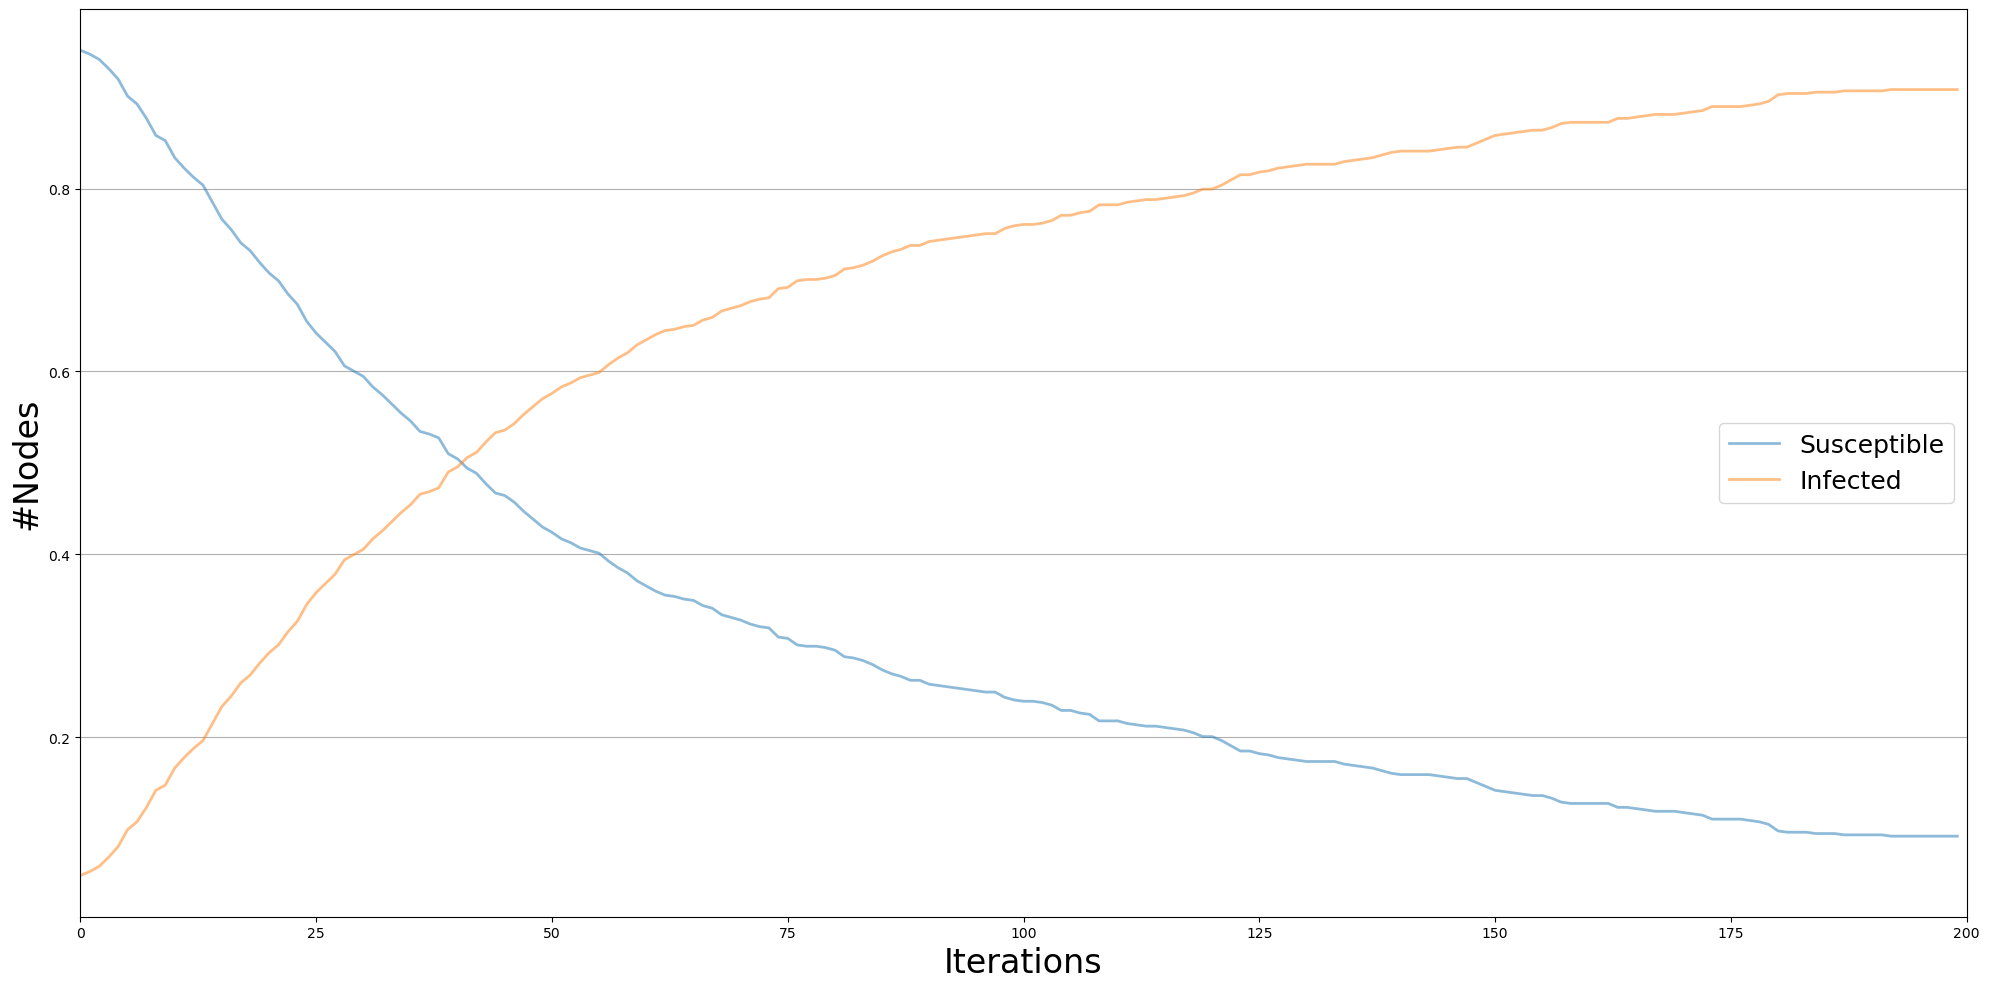

In [37]:

# Define the SI model
model = ep.SIModel(G)

# Model Configuration
cfg = mc.Configuration()
cfg.add_model_parameter('beta', 0.01)
cfg.add_model_parameter("fraction_infected", 0.05)
model.set_initial_status(cfg)

# Simulation execution

iteration = model.iteration_bunch(200)
# Iterations provides a list where each element is the status of each node in that iteration
# For efficiency, the status is only recorded for nodes that have changed in that iteration
# For example, asking for the element 4 gets the changed status on the 4th iteration (tick of the simulation):
#  the status of nodes changed since last iteration, the count of nodes in each state, and the change in numbers per state since last iteration
# Status is identified by number: 0 = susceptible, 1 = infected, 2 = removed
# If we wanted to computationally analyse the model behaviour, we would use this data
iteration[4]
trends_a = model.build_trends(iteration)
%matplotlib inline
from ndlib.viz.mpl.DiffusionTrend import DiffusionTrend

viz = DiffusionTrend(model, trends_a)
viz.plot()

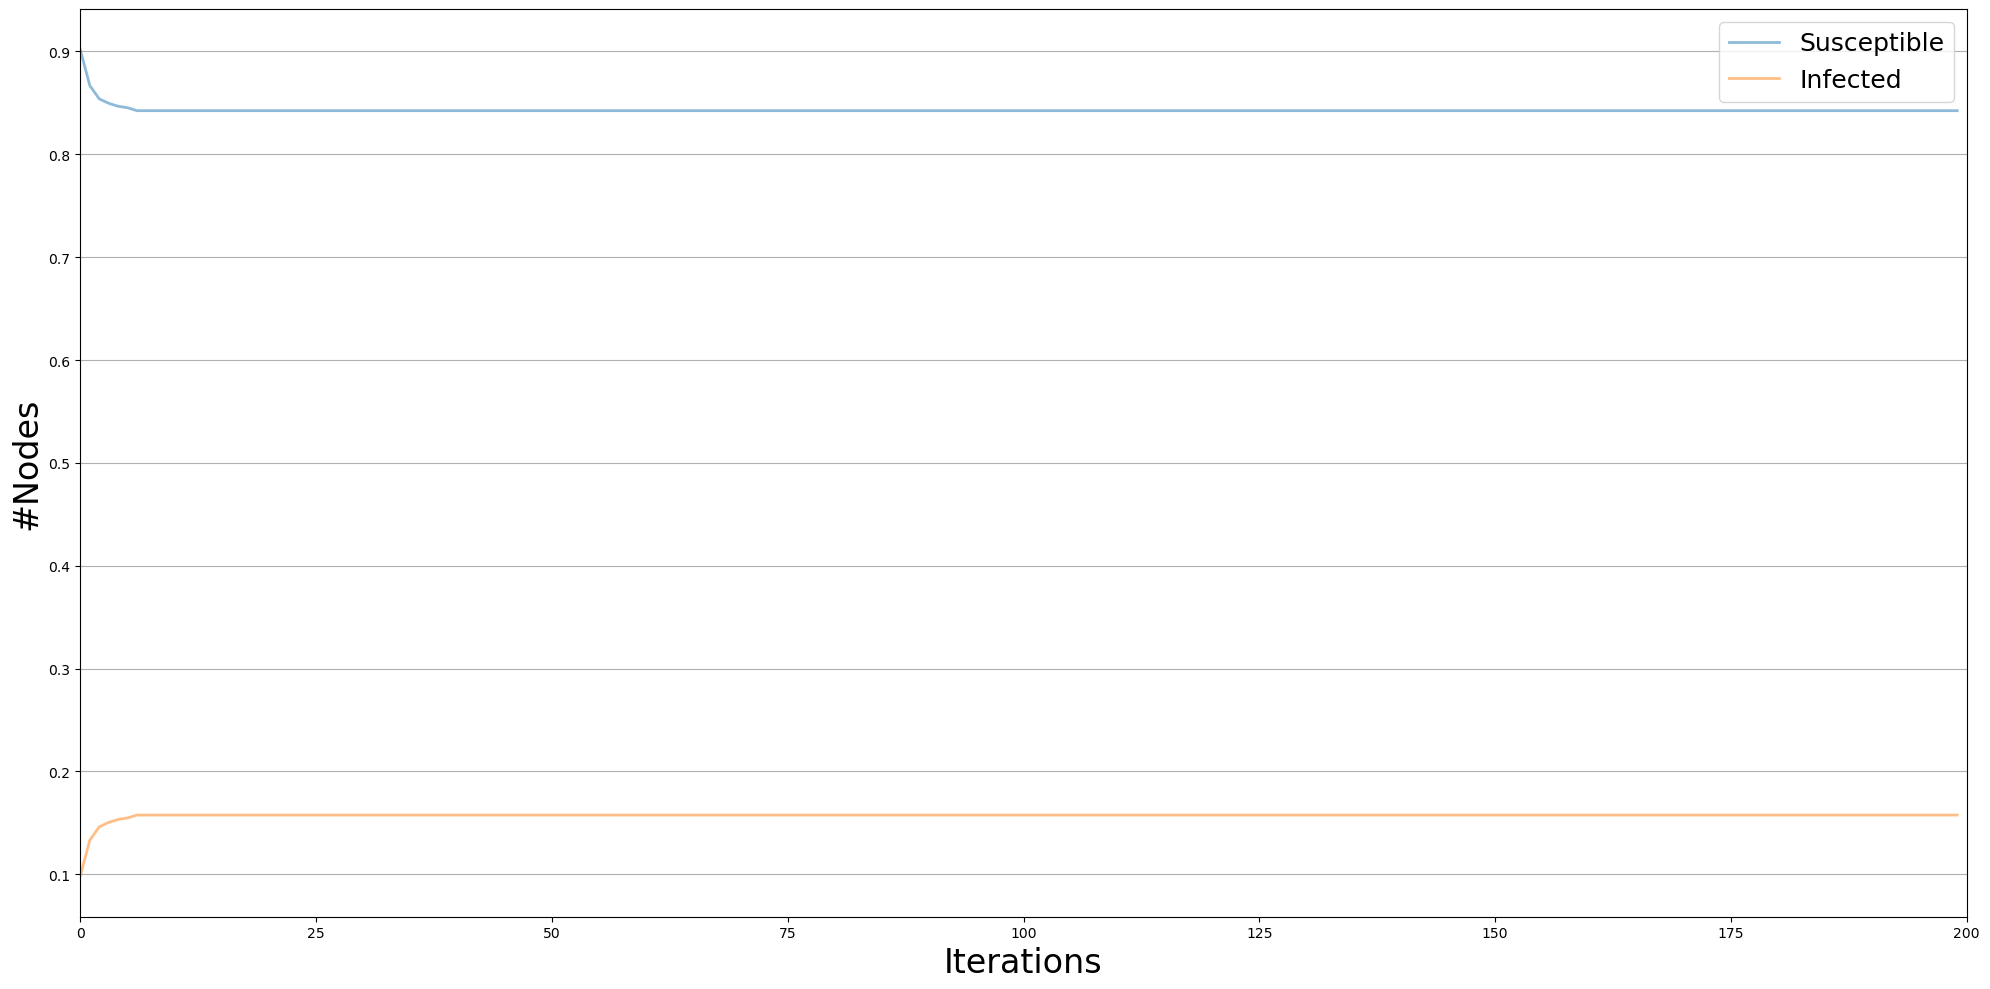

In [38]:
# Model selection
model = ep.ThresholdModel(G)

# Model Configuration
config = mc.Configuration()
config.add_model_parameter('fraction_infected', 0.1)

# Setting node parameters
threshold = 0.2
for i in G.nodes():
    config.add_node_configuration("threshold", i, threshold)

model.set_initial_status(config)

# Simulation execution
iterations = model.iteration_bunch(200)

trends_a = model.build_trends(iterations)
%matplotlib inline
from ndlib.viz.mpl.DiffusionTrend import DiffusionTrend

viz = DiffusionTrend(model, trends_a)
viz.plot()

In [39]:
import networkx as nx
import ndlib.models.epidemics as ep
import ndlib.models.ModelConfig as mc


# set up the SI model
model = ep.SIModel(G)

# configure the model with initial infection probability
config = mc.Configuration()
config.add_model_parameter('beta', 0.01) # infection probability
config.add_model_parameter("fraction_infected", 0.1) # initial fraction of infected nodes

# set the initial status of two nodes as infected
initial_infections = [editor1, editor2]  # replace with the node IDs of the nodes you want to infect
# set the initial status of two nodes as infected
for node in G.nodes:
    if node in initial_infections:
        config.add_node_configuration("status", node, "I")
    else:
        config.add_node_configuration("status", node, "S")

model.set_initial_status(config)

# simulate the model
iterations = model.iteration_bunch(10)

# get the infection status of each node
status = model.get_status_map()
status = {node: status[node] for node in status if node in G}
print(status)

# sort the nodes based on their infection status
priority_list = sorted(status.keys(), key=lambda x: len(G.neighbors(x)), reverse=True)

# print priority list
for node_id in priority_list:
    print(G.nodes[node_id]['name'], "has", len(G.neighbors(node_id)), "infected neighbors")


{}


New tinggggggg

In [40]:
data = pd.read_csv("REQUEST_A_QUERY.csv")

def calculate_average_weight(graph, node):
    # Create an empty dataframe to store the edge weights
    weight_df = pd.DataFrame()
    # Iterate over the neighbors of the given node
    for neighbor in graph.neighbors(node):
        # Find the edge between the given node and its neighbor
        df1 = data[(data["source"] == node) & (data["target"] == neighbor)]
        # Find the edge between the neighbor and the given node
        df2 = data[(data["target"] == node) & (data["source"] == neighbor)]
        
        # Concatenate the two dataframes to include both directions of the edge
        df = pd.concat([df1, df2])
        weight_df = pd.concat([weight_df, df], ignore_index=True)

    # Calculate the average weight of the edges for the given node
    average_weight = weight_df.weight.mean()

    # Return the average weight as the threshold for the given node
    return average_weight


In [41]:
# Select two nodes randomly
def random_choice(graph):
    n1 = np.random.choice(graph.nodes())
    n2 = np.random.choice(graph.nodes()) 
    infected_nodes = [n1,n2]
    return infected_nodes

In [42]:
largest_component = max(nx.connected_components(G), key=len)
G = G.subgraph(largest_component)


In [43]:
# # Model selection
# model = ep.ThresholdModel(G)

# # Model Configuration
# config = mc.Configuration()
# # infected_nodes = [editor1, editor2]
# infected_nodes = random_choice(G)
# # Set the initial infected nodes
# config.add_model_initial_configuration("Infected", infected_nodes)

# # Setting the edge parameters
# threshold = 0.5
# for e in G.edges():
#     config.add_edge_configuration("threshold", e, threshold)

# model.set_initial_status(config)

# # Simulation execution
# iterations_test = model.iteration_bunch(50)
# trends_test = model.build_trends(iterations_test)


# viz = DiffusionTrend(model, trends_test)
# viz.plot()
# G.number_of_nodes()

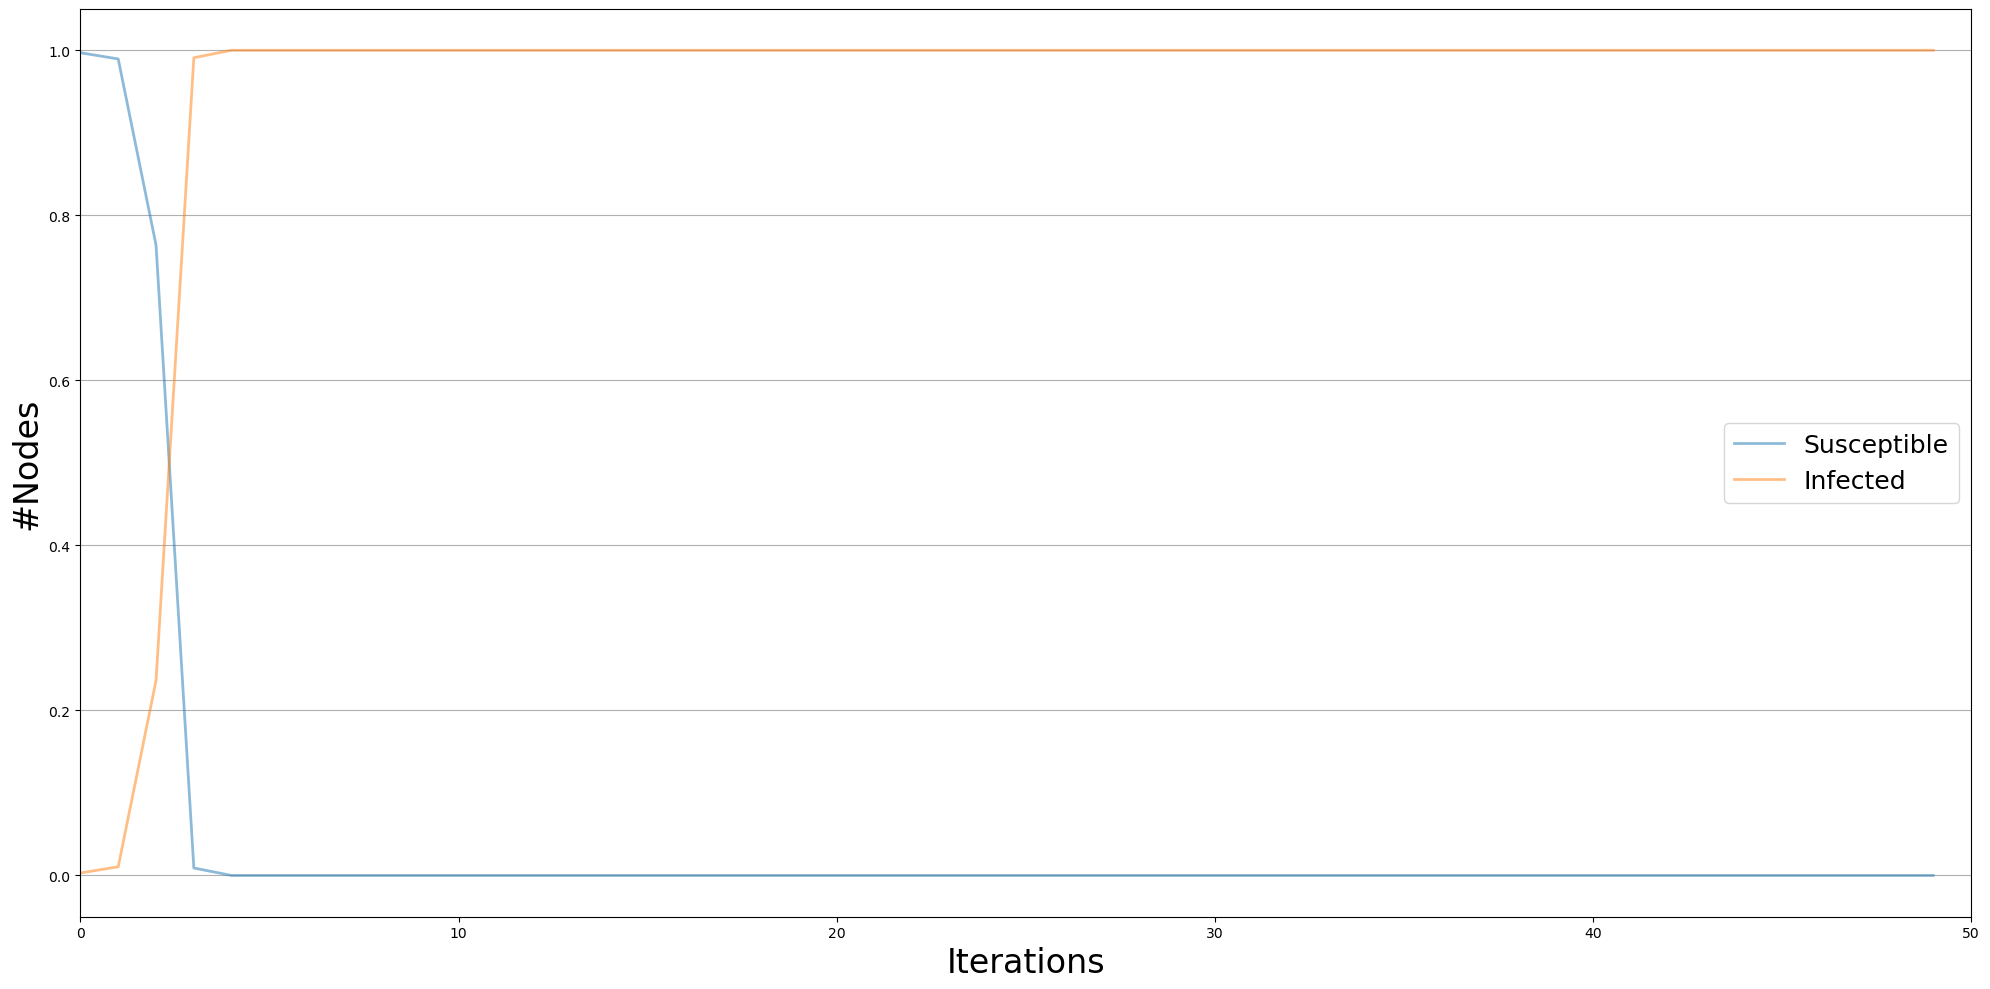

In [82]:
# best case
bc_model = ep.ThresholdModel(G)
bc_config = mc.Configuration()

infected_num = 2/G.number_of_nodes()
bc_config.add_model_parameter("fraction_infected", infected_num)

for node in G.nodes():
    threshold = 0.01
    bc_config.add_node_configuration("threshold", node, threshold)

bc_model.set_initial_status(bc_config)

bc_iterations = bc_model.iteration_bunch(50)
best_Case = bc_model.build_trends(bc_iterations)

viz = DiffusionTrend(bc_model, best_Case)
viz.plot()

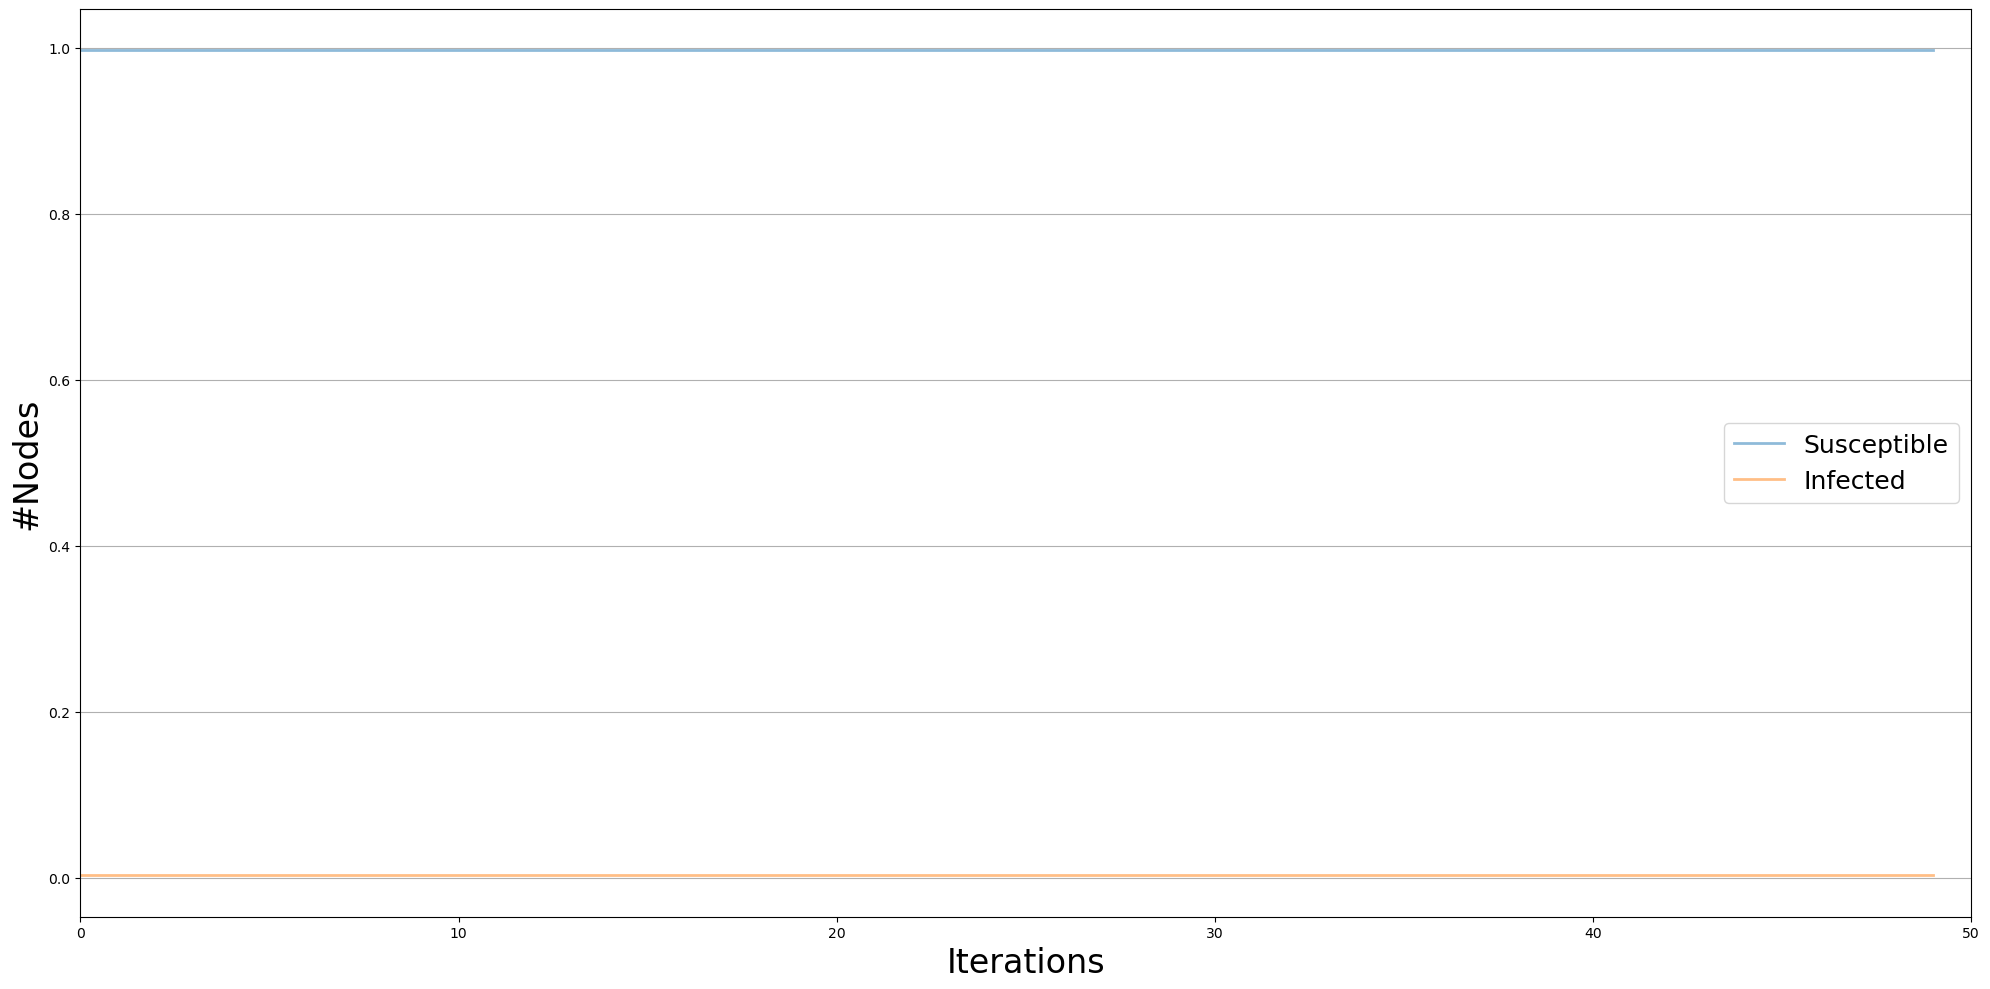

In [45]:
# worst case
wc_model = ep.ThresholdModel(G)
wc_config = mc.Configuration()
wc_config.add_model_parameter("fraction_infected", infected_num)

for node in G.nodes():
    threshold = 0.99
    wc_config.add_node_configuration("threshold", node, threshold)

wc_model.set_initial_status(wc_config)

wc_iterations = wc_model.iteration_bunch(50)
worst_case = wc_model.build_trends(wc_iterations)

viz = DiffusionTrend(wc_model, worst_case)
viz.plot()

PART B TASK C

In [46]:
# def bacon_number(graph, bacon):
#     diameter_sequence = []
#     for n in graph.nodes():
#         # Because nx.shortest only return a list of nodes not the diameter, so we need n-1
#         diameter = len(nx.shortest_path(G_hnet, bacon, n))-1 
#         diameter_sequence.append(diameter)
#     # Plot the diameter distribution of the graph
#     diameterCount = collections.Counter(diameter_sequence)
#     dia, cnt = zip(*diameterCount.items())
#     dia = list(dia)
#     cnt = list(cnt)
#     df = {"Diameter" : dia,"Count" : cnt}
#     df = pd.DataFrame(df).sort_values(by = "Diameter")
#     print(df)
#     fig, ax = plt.subplots()
#     plt.plot(df["Diameter"],df["Count"],color = "b")
#     plt.title("Diameter Line Chart")
#     plt.ylabel("Count")
#     plt.xlabel("Diameter")
#     plt.show()
# # Because the graph has only one connected components, so we can choose a famous and popular song as the "Kevin Bacon"
# # For example, we take "isophonics_5" as the most famous songs, the picture shows that it is more like a small word network.
# bacon_number(G_hnet, "isophonics_5")   

# # Let us first consider the shortest path as the criterion for preference, the shorter the path, the more preferred
# selected_song = np.random.choice(G_hnet.nodes())
# name = meta_df["title"][meta_df["id"] == selected_song].values[0]
# print("The song being selected is: ",name)
# bacon_number(G_hnet, selected_song) 

# df = pd.DataFrame()
# # get the weight of each edge of node    
# for n in G_hnet.neighbors(selected_song):
#     df1 = hnet_edgelist_df[(hnet_edgelist_df["source"] == selected_song) & (hnet_edgelist_df["target"] == n)]
#     df2 = hnet_edgelist_df[(hnet_edgelist_df["target"] == selected_song) & (hnet_edgelist_df["source"] == n)]
#     df1 = pd.concat([df1, df2])
#     df = pd.concat([df, df1],ignore_index=True)
# # sort the nodes by weight
# df = df.sort_values(by="weight",axis=0,inplace=False, ascending = False).reset_index(drop = True)
# priority_list = []

# for x in range(df.shape[0]):
#     priority_dict = { }
#     # get source
#     df_source = df.iloc[x, 0]
#     # get target
#     df_target = df.iloc[x, 1]
#     # get the neighbors real name
#     if df_source == selected_song:
#         priority_dict[meta_df["title"][meta_df["id"] == df_target].values[0]]=df.iloc[x, 2]
#         priority_list.append(priority_dict)
#     else:
#         priority_dict[meta_df["title"][meta_df["id"] == df_source].values[0]]=df.iloc[x, 2]
#         priority_list.append(priority_dict)
# print("The priority list on what songs to check first is below: ")
# priority_list




In [47]:
# def diameter_distance(graph, bacon):
#     # Compute diameter sequence
#     diameter_sequence = [len(nx.shortest_path(graph, bacon, n))-1 for n in graph.nodes()]
    
#     # Create DataFrame and plot
#     df = pd.DataFrame({'Diameter': diameter_sequence}).groupby('Diameter').size().reset_index(name='Count')
#     df.plot(x='Diameter', y='Count', kind='line', title='Diameter Line Chart', xlabel='Diameter', ylabel='Count')
#     plt.show()


### NEW TASK C PART B

#### In the case of one editor trolling

In [48]:
def priority_list_one_editor(G, selected_editor):
    # Getting the list of neighbors of the selected editor
    neighbors = list(G.neighbors(selected_editor))
    
    # Calculating the degree centrality for each neighbor
    centrality_scores = nx.degree_centrality(G)
    neighbor_scores = [(n, centrality_scores[n]) for n in neighbors]
    
    # Sorting the neighbors based on their degree centrality in descending order.
    neighbor_scores.sort(key=lambda x: x[1], reverse=True)
    print(neighbor_scores)
    # Returning the list of neighbors in descending order of degree centrality
    return [n[0] for n in neighbor_scores]

In [49]:
# Selecting two random editors
def random_choice_of_editors(g):
    editor1 = np.random.choice(g.nodes())
    editor2 = np.random.choice(g.nodes()) 
    trolling_nodes = [editor1,editor2]
    return trolling_nodes

In [50]:
selected_editor_id = random_choice_of_editors(G)[0]
print("Selected editor ID:", selected_editor_id)
# changing this to the ID of the editor to prioritize its neighbors for checking
neighbors_to_check = priority_list_one_editor(G, selected_editor_id)
print("Priority list of neighbors to check:", neighbors_to_check)

Selected editor ID: 509
[(265, 0.34638554216867473), (9, 0.31927710843373497), (122, 0.04066265060240964)]
Priority list of neighbors to check: [265, 9, 122]


#### In the case of two editors trolling

In [77]:
def priority_list_two_editors(G, editor1, editor2):
    # Get the neighbors of editor1 and editor2
    neighbors1 = G.neighbors(editor1)
    neighbors2 = G.neighbors(editor2)

    # Combine the neighbor lists and remove duplicates
    neighbors = list(set(list(neighbors1) + list(neighbors2)))


    # Calculate the degree centrality for each neighbor
    deg_centrality = nx.degree_centrality(G)
    neighbor_centrality = {n: deg_centrality[n] for n in neighbors}
    

    # Sort the neighbors by degree centrality in descending order
    sorted_neighbors = sorted(neighbor_centrality.items(), key=lambda x: x[1], reverse=True)
    print("Sorted neighbours with the degree centralities:",sorted_neighbors)

    # Return the priority list of neighbors
    return [n[0] for n in sorted_neighbors]

In [78]:
editor1 = random_choice_of_editors(G)[0]
editor2 = random_choice_of_editors(G)[1]
print("efitor 1:", editor1)
print("editor 2:", editor2)
priority_list = priority_list_two_editors(G, editor1, editor2)
print("priority_list:",priority_list)

efitor 1: 216
editor 2: 484
Sorted neighbours with the degree centralities: [(30, 0.5512048192771085), (265, 0.34638554216867473), (9, 0.31927710843373497), (26, 0.177710843373494), (173, 0.15963855421686748), (17, 0.07078313253012049), (58, 0.06927710843373494), (19, 0.04066265060240964), (14, 0.0391566265060241), (115, 0.02560240963855422), (273, 0.015060240963855422), (657, 0.007530120481927711), (690, 0.007530120481927711), (576, 0.006024096385542169), (465, 0.006024096385542169), (539, 0.004518072289156627), (541, 0.004518072289156627)]
priority_list: [30, 265, 9, 26, 173, 17, 58, 19, 14, 115, 273, 657, 690, 576, 465, 539, 541]
